In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("corona-germany.csv")
df.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen
0,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,1584304,2020-03-30T00:00:00.000Z,1056,"10.04.2020, 00:00 Uhr",0,-9,2020-03-30T00:00:00.000Z,0,1
1,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,1584305,2020-03-31T00:00:00.000Z,1056,"10.04.2020, 00:00 Uhr",0,-9,2020-03-29T00:00:00.000Z,-9,0
2,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,1584306,2020-03-31T00:00:00.000Z,1056,"10.04.2020, 00:00 Uhr",0,-9,2020-04-04T00:00:00.000Z,-9,0
3,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,1584307,2020-04-02T00:00:00.000Z,1056,"10.04.2020, 00:00 Uhr",0,-9,2020-04-02T00:00:00.000Z,-9,0
4,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,1584308,2020-04-03T00:00:00.000Z,1056,"10.04.2020, 00:00 Uhr",0,-9,2020-03-30T00:00:00.000Z,-9,0


In [3]:
bundesland = df.groupby(['Bundesland','Meldedatum'], as_index=False,axis=0).sum()
bundesland.head()

,Bundesland,Meldedatum,IdBundesland,AnzahlFall,AnzahlTodesfall,ObjectId,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen
0,Baden-Württemberg,2020-01-05T00:00:00.000Z,8,1,0,1619599,8115,0,-9,0,1
1,Baden-Württemberg,2020-01-30T00:00:00.000Z,16,2,0,3258132,16558,0,-18,-18,0
2,Baden-Württemberg,2020-01-31T00:00:00.000Z,8,1,0,1621541,8118,0,-9,0,1
3,Baden-Württemberg,2020-02-02T00:00:00.000Z,8,1,0,1631520,8335,0,-9,-9,0
4,Baden-Württemberg,2020-02-23T00:00:00.000Z,72,12,0,14626467,73788,0,-81,-9,11


In [4]:
bundesland['Meldedatum'] = pd.to_datetime(bundesland['Meldedatum'], format='%Y-%m-%dT%H:%M:%S.%f')
bundesland['tagImJahr'] = bundesland['Meldedatum'].dt.dayofyear

columns =range(bundesland['tagImJahr'].min(),bundesland['tagImJahr'].max())
plot= pd.DataFrame(index=bundesland['Bundesland'].unique(),columns=columns)

for tag in columns:
    for index, row in bundesland[bundesland['tagImJahr']==tag].iterrows():
        plot.loc[[row['Bundesland']],tag]=row['AnzahlFall']
plot.replace(np.nan,0,inplace=True)
plot

,5,6,7,8,9,10,11,12,13,14,...,90,91,92,93,94,95,96,97,98,99
Baden-Württemberg,1,0,0,0,0,0,0,0,0,0,...,892,1218,1219,1372,1246,816,484,541,825,618
Bayern,0,0,0,0,0,0,0,0,0,0,...,992,1760,1929,1948,1926,1425,676,1074,1430,1400
Berlin,0,0,0,0,0,0,0,0,0,0,...,167,215,187,225,238,108,75,148,197,172
Brandenburg,0,0,0,0,0,0,0,0,0,0,...,90,124,71,100,127,38,24,67,99,96
Bremen,0,0,0,0,0,0,0,0,0,0,...,9,17,16,11,34,15,3,5,35,0
Hamburg,0,0,0,0,0,0,0,0,0,0,...,73,148,129,167,151,106,105,103,175,97
Hessen,0,0,0,0,0,0,0,0,0,0,...,184,254,334,262,247,223,93,136,246,298
Mecklenburg-Vorpommern,0,0,0,0,0,0,0,0,0,0,...,13,50,23,29,32,15,2,4,36,8
Niedersachsen,0,0,0,0,0,0,0,0,0,0,...,302,352,367,331,380,226,141,228,367,312
Nordrhein-Westfalen,0,0,0,0,0,0,0,0,0,0,...,866,1094,1148,1205,1025,671,497,856,884,880


In [5]:
for column in list(columns)[1:]:
    plot[column]=list(plot[column-1]+plot[column])
plot

,5,6,7,8,9,10,11,12,13,14,...,90,91,92,93,94,95,96,97,98,99
Baden-Württemberg,1,1,1,1,1,1,1,1,1,1,...,13873,15091,16310,17682,18928,19744,20228,20769,21594,22212
Bayern,0,0,0,0,0,0,0,0,0,0,...,16078,17838,19767,21715,23641,25066,25742,26816,28246,29646
Berlin,0,0,0,0,0,0,0,0,0,0,...,2657,2872,3059,3284,3522,3630,3705,3853,4050,4222
Brandenburg,0,0,0,0,0,0,0,0,0,0,...,927,1051,1122,1222,1349,1387,1411,1478,1577,1673
Bremen,0,0,0,0,0,0,0,0,0,0,...,299,316,332,343,377,392,395,400,435,435
Hamburg,0,0,0,0,0,0,0,0,0,0,...,2295,2443,2572,2739,2890,2996,3101,3204,3379,3476
Hessen,0,0,0,0,0,0,0,0,0,0,...,3321,3575,3909,4171,4418,4641,4734,4870,5116,5414
Mecklenburg-Vorpommern,0,0,0,0,0,0,0,0,0,0,...,376,426,449,478,510,525,527,531,567,575
Niedersachsen,0,0,0,0,0,0,0,0,0,0,...,4333,4685,5052,5383,5763,5989,6130,6358,6725,7037
Nordrhein-Westfalen,0,0,0,0,0,0,0,0,0,0,...,14564,15658,16806,18011,19036,19707,20204,21060,21944,22824


In [6]:
import math
plot=plot*1.01
plot = np.log(plot)
plot.replace([np.inf, -np.inf],0,inplace=True)
plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,5,6,7,8,9,10,11,12,13,14,...,90,91,92,93,94,95,96,97,98,99
Baden-Württemberg,0.00995,0.00995,0.00995,0.00995,0.00995,0.00995,0.00995,0.00995,0.00995,0.00995,...,9.547650,9.631804,9.709484,9.790253,9.858348,9.900555,9.924773,9.951167,9.990121,10.018338
Bayern,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,9.695157,9.799037,9.901719,9.995709,10.080688,10.139218,10.165830,10.206704,10.258657,10.307033
Berlin,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.894903,7.972714,8.035794,8.106768,8.176735,8.206938,8.227389,8.266558,8.316422,8.358015
Brandenburg,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6.841904,6.967448,7.032818,7.118194,7.217069,7.244849,7.262004,7.308395,7.373230,7.432324
Bremen,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,5.710394,5.765693,5.815085,5.847681,5.942196,5.981212,5.988836,6.001415,6.085296,6.085296
Hamburg,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.748438,7.810932,7.862389,7.925299,7.978962,8.014984,8.049430,8.082106,8.135285,8.163588
Hessen,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,8.117972,8.191671,8.280987,8.345861,8.403393,8.452635,8.472476,8.500800,8.550078,8.606694
Mecklenburg-Vorpommern,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,5.939539,6.064390,6.116973,6.179561,6.244361,6.273349,6.277151,6.284712,6.350310,6.364320
Niedersachsen,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,8.383966,8.462072,8.537490,8.600951,8.669164,8.707630,8.730900,8.767419,8.823538,8.868888
Nordrhein-Westfalen,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,9.596258,9.668688,9.739442,9.808688,9.864038,9.898680,9.923586,9.965081,10.006199,10.045518


In [7]:
df_places = gpd.read_file('bundesland.geojson')

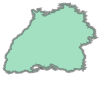

In [8]:
df_places['geometry'][0]

In [9]:
bundesland.columns

Index(['Bundesland', 'Meldedatum', 'IdBundesland', 'AnzahlFall',
       'AnzahlTodesfall', 'ObjectId', 'IdLandkreis', 'NeuerFall',
       'NeuerTodesfall', 'NeuGenesen', 'AnzahlGenesen', 'tagImJahr'],
      dtype='object')

In [10]:
plot[5]

Baden-Württemberg         0.00995
Bayern                    0.00000
Berlin                    0.00000
Brandenburg               0.00000
Bremen                    0.00000
Hamburg                   0.00000
Hessen                    0.00000
Mecklenburg-Vorpommern    0.00000
Niedersachsen             0.00000
Nordrhein-Westfalen       0.00000
Rheinland-Pfalz           0.00000
Saarland                  0.00000
Sachsen                   0.00000
Sachsen-Anhalt            0.00000
Schleswig-Holstein        0.00000
Thüringen                 0.00000
Name: 5, dtype: float64

In [11]:
df_places.sort_values(['NAME_1'], axis=0, ascending=True)
df_places['plotvalue']=plot[99].tolist()
df_places = df_places.to_crs("EPSG:3395") #Mercator projection
df_places.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry,plotvalue
0,86,DEU,Germany,1,Baden-Württemberg,None,None,Land,State,"MULTIPOLYGON (((1074284.320 6374988.234, 10749...",10.018338
1,86,DEU,Germany,2,Bayern,None,Bavaria,Land,State,"POLYGON ((1128096.094 6509062.291, 1128757.381...",10.307033


In [17]:
for day in range(22,100): #columns
    df_places['plotvalue']=plot[day].tolist()
    f, ax = plt.subplots(1, figsize=(15, 20), dpi=100)
    df_places = df_places.to_crs("EPSG:3395") #Mercator projection
    #cbar = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('Reds'),norm=mpl.colors.Normalize(vmin=-0.5, vmax=1.5))
    #cbar.set_clim(-2.0, 2.0)

    ax = df_places.plot(column="plotvalue", cmap='Reds' ,ax=ax,legend=False, vmin=0, vmax=10.3)
    ax.set_title('Corona Virus 2020: Day '+str(day))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    plt.savefig("images/"+str(day-22).zfill(4)+".png", format='png')
    plt.close()

In [18]:
!cd images && rm output.mp4
!cd images && ffmpeg -framerate 5 -i %04d.png -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p output.mp4

rm: cannot remove 'output.mp4': No such file or directory
ffmpeg version 4.1.4-1build2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.2.1-4ubuntu1)
  configuration: --prefix=/usr --extra-version=1build2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolam